In [3]:
%matplotlib notebook 
from importlib import reload
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import dnaplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec

## Define your circuit and plot it. 

In [4]:
plac = {'name':'P_lac', 'start':1, 'end':10, 'type':'Promoter', 'opts': {'color':[0.38, 0.82, 0.32]}}
rbs1 = {'name':'RBS', 'start':11, 'end':20, 'type':'RBS', 'opts':{'linewidth': 0, 'color':[0.0, 0.0, 0.0]}}
tetr = {'name':'tetR', 'start':21, 'end':40, 'type':'CDS', 'opts':{'label': 'tetR', 'fontsize': 8,  'label_y_offset': 0, 'label_x_offset': -2, 'label_style':'italic', 'color':[1.00, 0.75, 0.17]}}
term1 = {'name':'Term', 'start':41, 'end':55, 'type':'Terminator'}
pgamma = {'name':'P_gamma', 'start':56, 'end':65, 'type':'Promoter', 'opts': {'color':[0.38, 0.65, 0.87]}}
rbs2 = {'name':'RBS', 'start':66, 'end':75, 'type':'RBS', 'opts':{'linewidth': 0, 'color':[0.0, 0.0, 0.0]}}
laci = {'name':'lacI', 'start':76, 'end':95, 'type':'CDS', 'opts':{'label': 'lacI', 'fontsize': 8,  'label_y_offset': 0, 'label_x_offset': -2, 'label_style':'italic', 'color':[0.38, 0.82, 0.32]}}
term2 = {'name':'Term', 'start':96, 'end':110, 'type':'Terminator'}
ptet = {'name':'P_tet', 'start':111, 'end':120, 'type':'Promoter', 'opts': {'color':[1.00, 0.75, 0.17]}}
rbs3 = {'name':'RBS', 'start':121, 'end':130, 'type':'RBS', 'opts':{'linewidth': 0, 'color':[0.0, 0.0, 0.0]}}
gamma = {'name':'gamma', 'start':131, 'end':150, 'type':'CDS', 'opts':{'label': 'gamma', 'fontsize': 8, 'label_y_offset': 0, 'label_x_offset': -1, 'label_style':'italic', 'color':[0.38, 0.65, 0.87]}}
term3 = {'name':'Term', 'start':151, 'end':165, 'type':'Terminator'}

lac_repress = {'from_part':laci, 'to_part':plac, 'type':'Repression', 'opts':{'linewidth':1, 'color':[0.38, 0.82, 0.32]}}
gamma_repress = {'from_part':gamma, 'to_part':pgamma, 'type':'Repression', 'opts':{'linewidth':1, 'color':[0.38, 0.65, 0.87]}}
tet_repress = {'from_part':tetr, 'to_part':ptet, 'type':'Repression', 'opts':{'linewidth':1, 'color':[1.00, 0.75, 0.17]}}


<IPython.core.display.Javascript object>


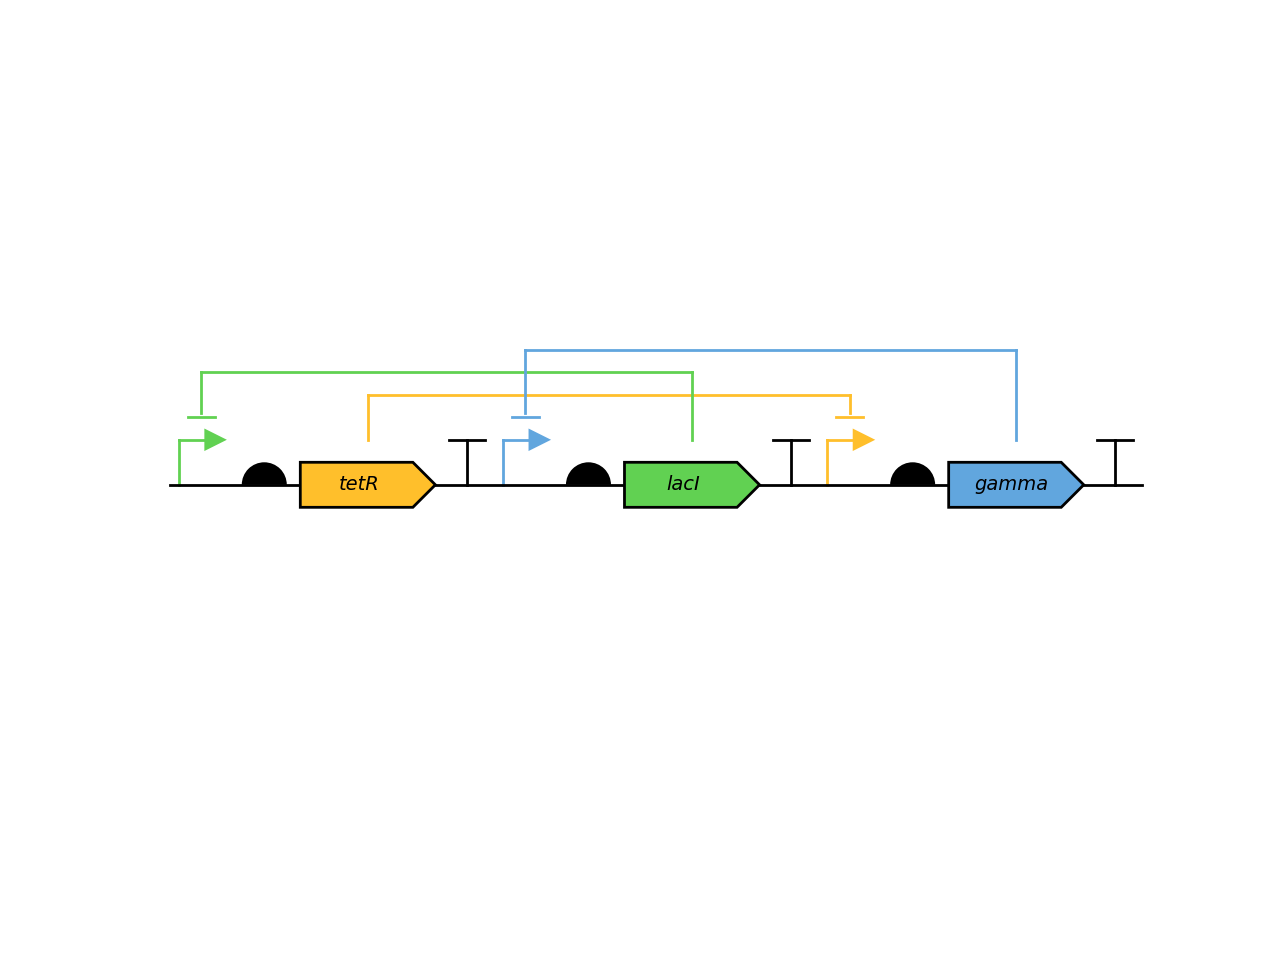

In [5]:
# make the plot 
f,ax = plt.subplots()
dnaplotlib.plot_sbol_designs([ax], [[plac, rbs1, tetr, term1, pgamma, rbs2, laci, term2, ptet, rbs3, gamma, term3]],
[[lac_repress, gamma_repress, tet_repress]])
f.show()

## Assemble the model and apply it to the SSIT.

In [6]:
import sys
sys.path.append('../codes')
import generic_solvers as gs
import cyber_circuits as cs
import numpy as np

reload(gs)
reload(cs)

cg = cs.CircuitGenerator()
model = gs.GenericModel()

tetr['model_type'] = 'transcription_translation'
laci['model_type'] = 'transcription_translation'
gamma['model_type'] = 'transcription_translation'
all_parts = [plac, rbs1, tetr, term1, pgamma, rbs2, laci, term2, ptet, rbs3, gamma, term3]
all_interactions = [lac_repress, gamma_repress, tet_repress]

model = cg.assemble_model(all_parts,all_interactions)

# set some initial conditions
# model.initial_state = np.zeros(S.shape[1])
 
#set the times to record solutions
model.time = np.linspace(0,50,100)

# define parameter amounts
model.parameter_array=np.ones(len(model.parameter_dict))
model.parameters = model.parameter_array

model.set_par_name('kb_tetR',1.0)
model.set_par_name('kmax_tetR',20.0)
model.set_par_name('kd_tetR',10.0)
model.set_par_name('kp_tetR',10.0)
model.set_par_name('n_tetR', 4.0)

model.set_par_name('kb_lacI',1.0)
model.set_par_name('kmax_lacI',20.0)
model.set_par_name('kd_lacI', 10.0)
model.set_par_name('kp_lacI', 10.0)
model.set_par_name('n_lacI', 4.0)

model.set_par_name('kb_gamma',1.0)
model.set_par_name('kmax_gamma',20.0)
model.set_par_name('kd_gamma', 10.0)
model.set_par_name('kp_gamma', 10.0)
model.set_par_name('n_gamma', 4.0)

print(model.propensities_str)

['kb_tetR+kmax_tetR**n_tetR/(kd_tetR**n_tetR+x[3]**n_tetR)', 'gr_tetR*x[0]', 'kp_tetR*x[0]', 'gp_tetR*x[1]', 'kb_lacI+kmax_lacI**n_lacI/(kd_lacI**n_lacI+x[5]**n_lacI)', 'gr_lacI*x[2]', 'kp_lacI*x[2]', 'gp_lacI*x[3]', 'kb_gamma+kmax_gamma**n_gamma/(kd_gamma**n_gamma+x[1]**n_gamma)', 'gr_gamma*x[4]', 'kp_gamma*x[4]', 'gp_gamma*x[5]']


## After creating the model, we can try to solve it with the SSIT. 

<IPython.core.display.Javascript object>


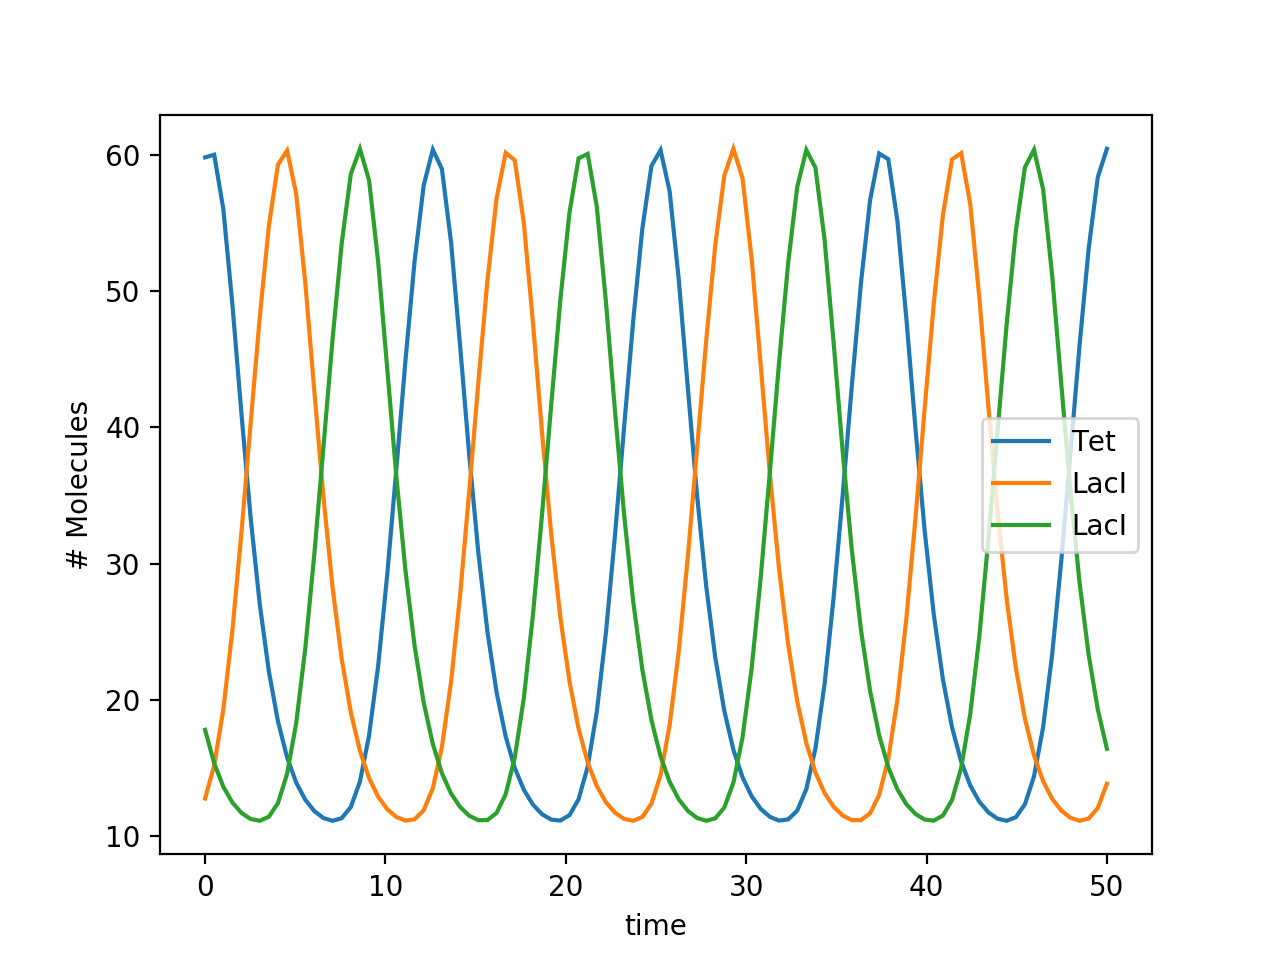

[ 6.06755212 60.45636804  1.87109371 13.84709331  1.15946079 16.40031241]


In [8]:
# Solve the model with the SSIT
ode = model.get_ODE()
model.initial_state = np.zeros(6)
#model.initial_state[1]=60
model.initial_state = np.array([ 6.42459913, 59.83041232,  1.61902936, 12.75172664,  1.20421375, 17.79813233])

ode_data=ode.run()

plt.figure()
plt.plot(ode_data.time,ode_data.state[:,1::2])
plt.legend(['Tet','LacI','LacI'])
plt.xlabel('time')
plt.ylabel('# Molecules')
print(ode_data.state[-1,:])

<IPython.core.display.Javascript object>


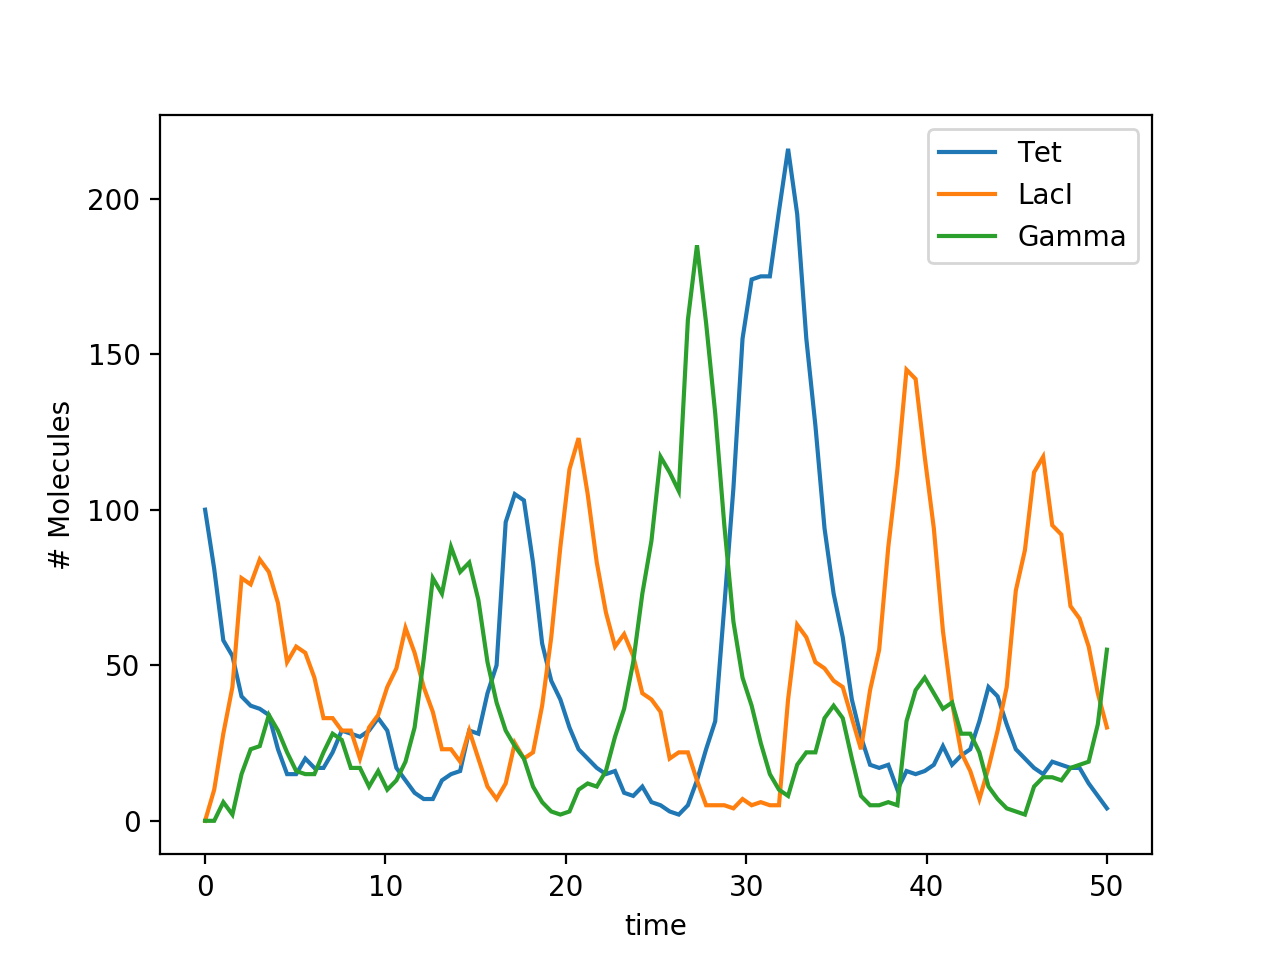

Text(0, 0.5, '# Molecules')

In [9]:
# Solve the SSA version. 

ssa = model.get_SSA()
ssa.initial_state = np.zeros(6)
ssa.initial_state[1]=100.0

ssa.num_samples = 100
ts_data=ssa.run()

plt.figure()
plt.plot(model.time,ts_data.get_time_series(0,1))
plt.plot(model.time,ts_data.get_time_series(0,3))
plt.plot(model.time,ts_data.get_time_series(0,5))
plt.legend(['Tet','LacI','Gamma'])
plt.xlabel('time')
plt.ylabel('# Molecules')


<IPython.core.display.Javascript object>


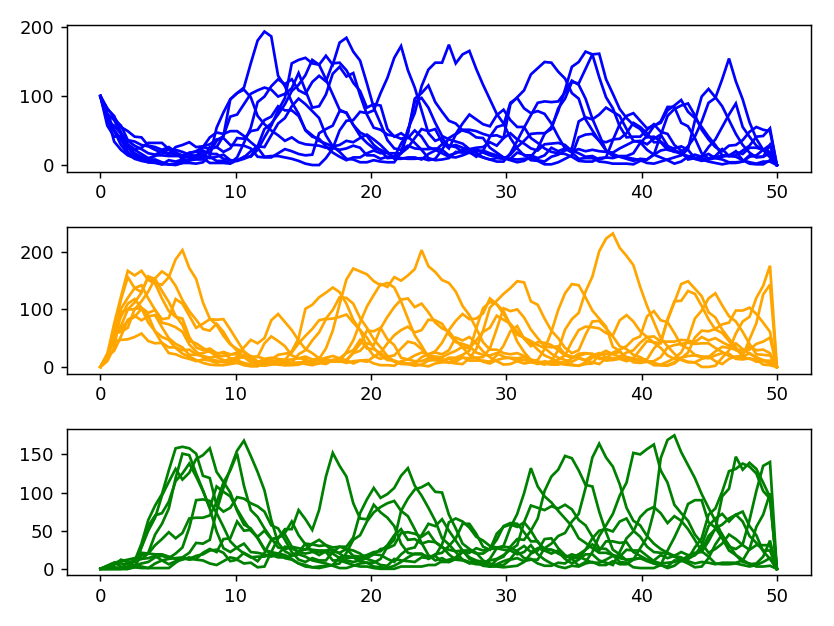

In [98]:
# Let's look at some variability between trajectories
f,ax = plt.subplots(3,1)
for i in range(10):
    ax[0].plot(model.time,ts_data.get_time_series(i,1),color='b')
    ax[1].plot(model.time,ts_data.get_time_series(i,3),color='orange')
    ax[2].plot(model.time,ts_data.get_time_series(i,5),color='g')
f.tight_layout()

<IPython.core.display.Javascript object>


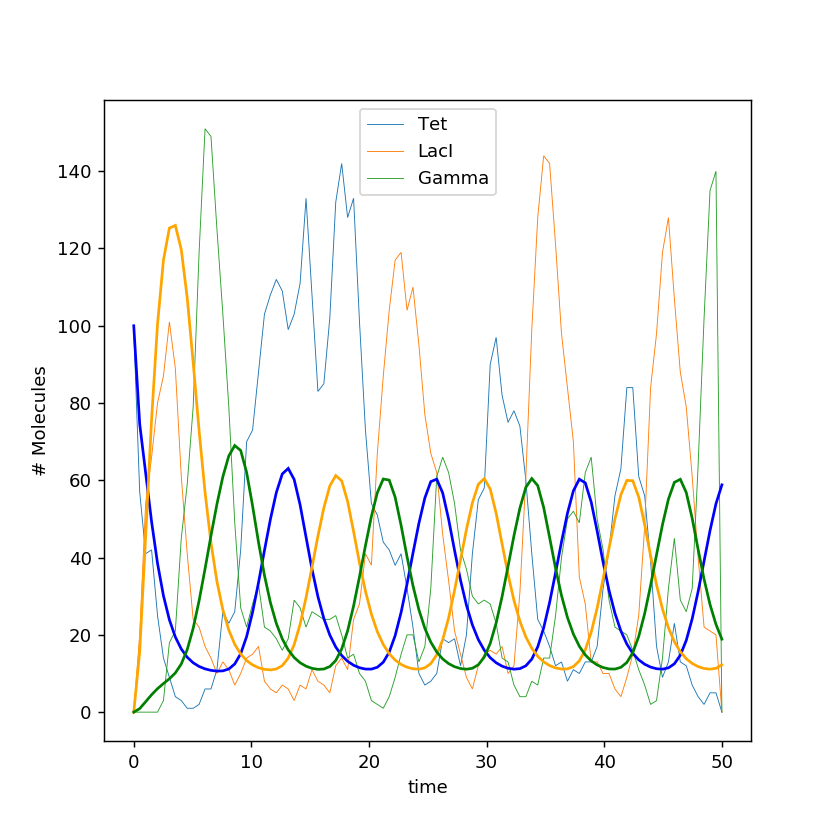

Text(0, 0.5, '# Molecules')

In [105]:
# Or the means of the SSA overlaid with the ode solutions. 
dt = ts_data.get_data_tensor()
means = np.mean(dt,axis=2)
plt.figure()
plt.plot(model.time,means[:,1::2],linewidth=0.5)
plt.plot(model.time,ode_data.state[:,1],color='b')
plt.plot(model.time,ode_data.state[:,3],color='orange')
plt.plot(model.time,ode_data.state[:,5],color='g')
plt.legend(['Tet','LacI','Gamma'])
plt.xlabel('time')
plt.ylabel('# Molecules')

<IPython.core.display.Javascript object>


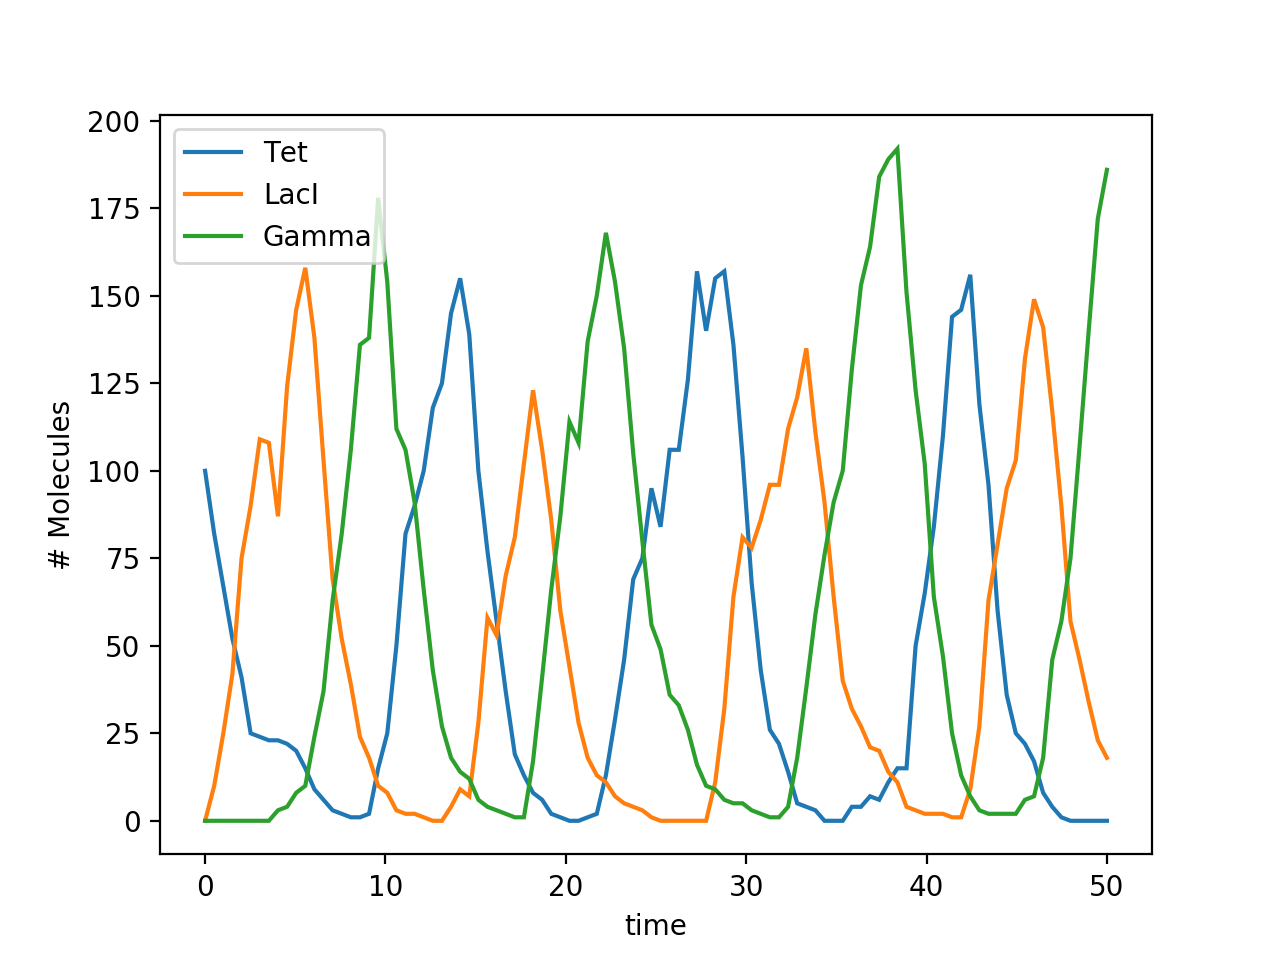

In [24]:
model.set_par_name('kb_tetR',0.0)
model.set_par_name('kmax_tetR',20.0)
model.set_par_name('kd_tetR',10.0)
model.set_par_name('kp_tetR',10.0)
model.set_par_name('n_tetR', 4.0)

model.set_par_name('kb_lacI',0.0)
model.set_par_name('kmax_lacI',20.0)
model.set_par_name('kd_lacI', 10.0)
model.set_par_name('kp_lacI', 10.0)
model.set_par_name('n_lacI', 4.0)

model.set_par_name('kb_gamma',0.0)
model.set_par_name('kmax_gamma',20.0)
model.set_par_name('kd_gamma', 10.0)
model.set_par_name('kp_gamma', 10.0)
model.set_par_name('n_gamma', 4.0)

# Solve the SSA version. 

ssa = model.get_SSA()
ssa.initial_state = np.zeros(6)
ssa.initial_state[1]=100.0

ssa.num_samples = 100
ts_data=ssa.run()

plt.figure()
plt.plot(model.time,ts_data.get_time_series(0,1))
plt.plot(model.time,ts_data.get_time_series(0,3))
plt.plot(model.time,ts_data.get_time_series(0,5))
plt.legend(['Tet','LacI','Gamma'])
plt.xlabel('time')
plt.ylabel('# Molecules')



## Or analyze decay by changing some parameters 

<IPython.core.display.Javascript object>


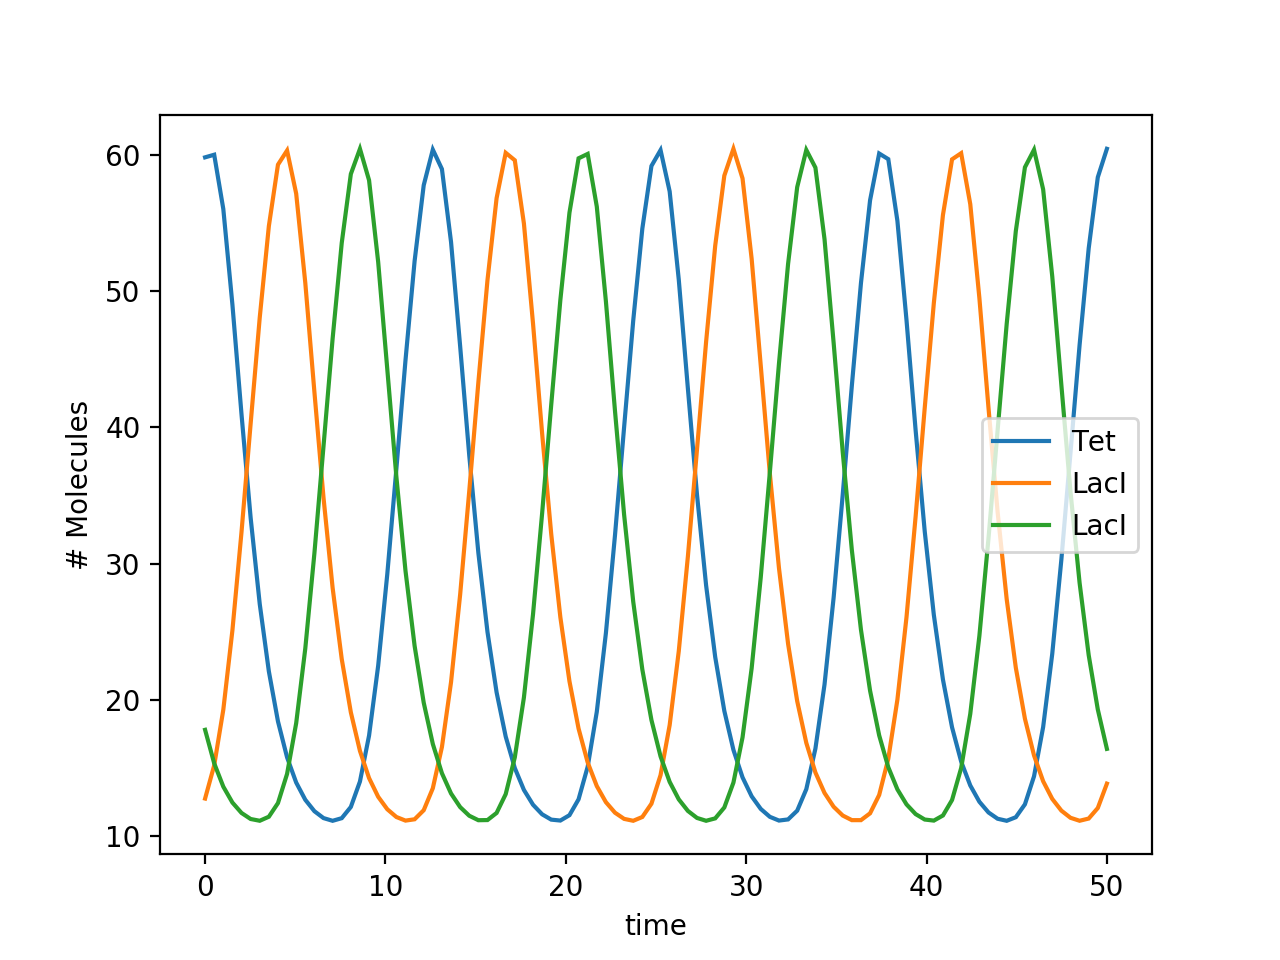

[ 6.06755212 60.45636804  1.87109371 13.84709331  1.15946079 16.40031241]


In [22]:
# Solve the model with the SSIT

model.initial_state = np.zeros(6)
#model.initial_state[1]=60
model.initial_state = np.array([ 6.42459913, 59.83041232,  1.61902936, 12.75172664,  1.20421375, 17.79813233])

model.set_par_name('kb_tetR',1.0)
model.set_par_name('kmax_tetR',20.0)
model.set_par_name('kd_tetR',10.0)
model.set_par_name('kp_tetR',10.0)
model.set_par_name('n_tetR', 4.0)

model.set_par_name('kb_lacI',1.0)
model.set_par_name('kmax_lacI',20.0)
model.set_par_name('kd_lacI', 10.0)
model.set_par_name('kp_lacI', 10.0)
model.set_par_name('n_lacI', 4.0)

model.set_par_name('kb_gamma',1.0)
model.set_par_name('kmax_gamma',20.0)
model.set_par_name('kd_gamma', 10.0)
model.set_par_name('kp_gamma', 10.0)
model.set_par_name('n_gamma', 4.0)

ode = model.get_ODE()
ode_data=ode.run()

plt.figure()
plt.plot(ode_data.time,ode_data.state[:,1::2])
plt.legend(['Tet','LacI','LacI'])
plt.xlabel('time')
plt.ylabel('# Molecules')
print(ode_data.state[-1,:])